/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


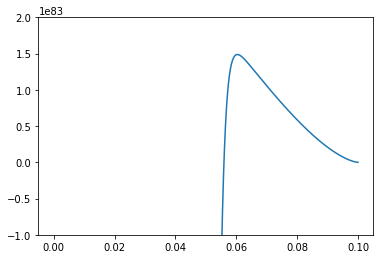

In [92]:
import numpy as np
from numpy import sin, cos
import matplotlib.pyplot as plt


def M(xi,omega,H=100, cp = 1500, cs = 100):
    alpha = ((omega/xi/cp)**2 - 1+0j)**(1/2)
    beta = ( (omega/xi/cs)**2 - 1+0j )**(1/2)
    k = (cp/cs)**2
    
    '''
    I*(A*xi*sin(H*alpha) + B*cos(H*alpha) + beta*(C*cos(H*beta) - D*sin(H*beta)))
    alpha*(A*cos(H*alpha) - B*sin(H*alpha)) + xi*(C*sin(H*beta) + D*cos(H*beta))
    mu*(B*(2*alpha**2 - k**2*(alpha**2 + xi**2)) + 2*C*beta*xi)
    I*mu*(2*A*alpha*xi - D*(beta**2 - xi**2))
    '''
    

#     A*xi*sin(H*alpha)    + B*cos(H*alpha)                           + C*beta*cos(H*beta) - D*beta*sin(H*beta)
#     A*alpha*cos(H*alpha) - B*alpha*sin(H*alpha)                     + C*xi*sin(H*beta)   + D*xi*cos(H*beta)
#     A*0                  + B*(2*alpha**2 - k**2*(alpha**2 + xi**2)) + C*2*beta*xi        + 0
#     A*2*alpha*xi         + 0                                        + 0                  - D*(beta**2 - xi**2)

    
    return np.array([
    [xi*sin(H*alpha),      cos(H*alpha),                          beta*cos(H*beta),   - beta*sin(H*beta)],
    [alpha*cos(H*alpha), - alpha*sin(H*alpha),                  + xi*sin(H*beta),     + xi*cos(H*beta) ],
    [0,                  (2*alpha**2 - k**2*(alpha**2 + xi**2)),  2*beta*xi, 0],
    [2*alpha*xi, 0, 0, - (beta**2 - xi**2)]
])

def obj(xi,omega):
    return np.abs(np.linalg.det(M(xi,f)))

from scipy.optimize import minimize

m = minimize(lambda f: obj(xi, x0,
flist = np.linspace(0.0,0.1,10000)
disp = []
for f in flist:
    disp.append(  )
disp=np.array(disp)

plt.subplots()
plt.plot(flist,disp)
plt.ylim([-1e83,2e83])
# plt.xlim([0,0.2])
# plt.plot(flist[disp>0],np.abs(disp[disp>0]))
# plt.plot(flist[disp<0],np.abs(disp[disp<0]))
# plt.yscale('log')

plt.show()